# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/mariamkg00/eds-220-hwk3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

The first dataset contains records of spills of petroleum and other hazardous materials in the state of NY. Columns include information about the spill's date and time, location, and bodies of water affected (if any).
The second dataset (county data) contains the current geographic boundaries of entities within the US, which includes Puerto Rico and some islands. It also includes some geographic feature files.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [157]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [158]:
# import libraries here
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [159]:
# importing NY data
spills = pd.read_csv('data/Spill_Incidents.csv')

# importing county data
counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [160]:
# checking the shape of the data frame
spills.shape

(542294, 20)

The NY Spills dataset has 542294 rows and 20 columns.

In [161]:
 # 1. using head(7) to see the first seven rows
spills.head(7)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0
5,311484,PRIVATE RESIDENCE,6568 GLEN HAVEN RD,NaN,SCOTT,Cortland,NaN,1238,7,01/11/2004,01/11/2004,Equipment Failure,NaN,Private Dwelling,08/25/2004,#2 fuel oil,Petroleum,75.0,Gallons,0.0
6,104307,149TH RD,"183RD ST, 149TH AV& 149RD",NaN,QUEENS,Queens,NaN,4101,2,07/23/2001,07/23/2001,Abandoned Drums,NaN,Unknown,08/01/2001,unknown material,Other,0.0,Gallons,0.0


In [162]:
# 2. changing the column names to be lower case 
spills.columns = spills.columns.str.lower()

#replacing space with _
spills.columns = spills.columns.str.replace(' ', '_')

# changing spill_date and received_date to date_time index
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.received_date = pd.to_datetime(spills.received_date)

In [163]:
# 3.
 # checking the data types of the columns in spills
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

In [164]:
# 4.  checking for unique values in material_family column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

There appears to be four options of material families : Petroleum, Hazardous Material, Oxygenates, and other. 

In [165]:
# 5.checking for unique values in the county column
spills.county.unique()

len(spills.county.unique())

87

In checking how many counties are included in the `spills` dataset, there appear to be 87 included. 

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [166]:
# filtering for dates and petroleum using loc 
petr_23 = spills.loc[(spills.spill_date >= '2023-01-01') & (spills.spill_date <= '2023-10-31') & (spills.material_family == 'Petroleum')]

2. Verify that `petr_23` only has data for petroleum spills 

In [167]:
# using unique for material family to make sure it only contains for petroleum
petr_23.material_family.unique()
len(petr_23.material_family.unique())

1

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [168]:
# checking the unique years to see if 2023 is the only year in this dataframe
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [169]:
# checking to see if data only contains specified months
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [170]:
# previewing the data
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541791,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,2023-01-22,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541794,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,2023-07-14,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
541904,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,2023-01-10,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542187,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,2023-05-16,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


In [171]:
# keeping county and spill_number columns
spills_per_county = petr_23[['county','spill_number']]

#grouping by the county names to see how many spills occurred in each county, 
# using count to count the total number of rows(occurrences) petroleum happened
spills_per_county = spills_per_county.groupby('county').count()

#converted back to dataframe
spills_per_county = pd.DataFrame(spills_per_county)

#renamed the column spill number to n_spills
spills_per_county = spills_per_county.rename(columns = {'spill_number':'n_spills'})

# reset the index so it can start from 0 
spills_per_county = spills_per_county.reset_index()
spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,733
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [172]:
# 1. previewing the first seven rows 
counties.head(7)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
5,72,085,01804523,72085,Las Piedras,Las Piedras Municipio,13,H1,G4020,NaN,NaN,NaN,A,87748418,32509,+18.1871483,-065.8711890,"POLYGON ((-65.85703 18.16468, -65.85733 18.164..."
6,46,099,01265772,46099,Minnehaha,Minnehaha County,06,H1,G4020,NaN,NaN,NaN,A,2089707824,18182409,+43.6674723,-096.7957261,"POLYGON ((-96.60910 43.50043, -96.61070 43.500..."


In [173]:
# 2. making column names lowercased
counties.columns = counties.columns.str.lower()
counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,NaN,NaN,NaN,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,NaN,NaN,NaN,A,4329793477,16913514,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,NaN,NaN,NaN,A,1850178077,71698127,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,NaN,NaN,NaN,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [174]:
# 3. using dtypes to see the data types of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [175]:
# 4. checking the crs for counties
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

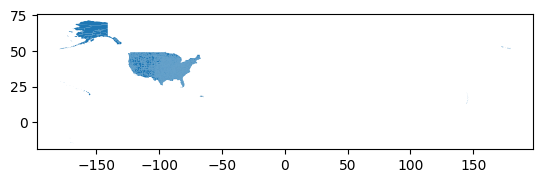

In [176]:
# 5. plotting counties data
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [177]:
# filtering for ny counties 
counties.dtypes
#converting type of data for the county fp column
counties['countyns']= counties['countyns'].astype('int')

In [178]:
#checking to see if changes were made
counties.dtypes

statefp       object
countyfp      object
countyns       int64
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

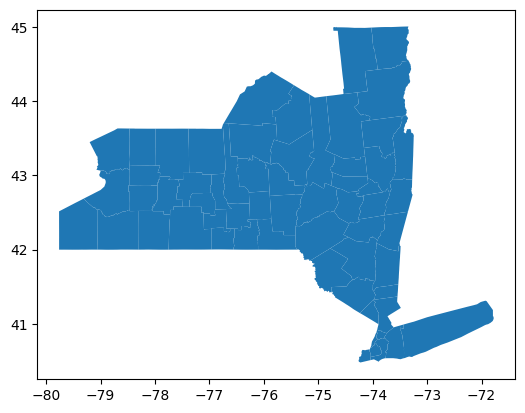

In [179]:
#using loc to specify which countyns corresponds to new york 
ny_counties = counties.loc[(counties.countyns >= 974099) & (counties.countyns <= 974159)]

#plotting the ny counties dataset
ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [180]:
# 1. printing ny_counties names
print(ny_counties.name.unique())
len(ny_counties.name.unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'Schuyler' 'Essex'
 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins' 'Albany' 'Cayuga'
 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton' 'Nassau' 'Madison'
 'Washington' 'Westchester' 'Lewis' 'Ontario' 'Cortland' 'Richmond' 'Erie'
 'Putnam' 'Montgomery' 'Sullivan' 'Orleans' 'Oneida' 'Cattaraugus' 'Yates'
 'Tioga' 'Monroe' 'Schoharie' 'Broome' 'Rensselaer' 'Seneca' 'Queens'
 'Genesee' 'Wayne' 'Niagara' 'Kings' 'Chemung' 'Wyoming' 'New York'
 'Columbia' 'Chautauqua' 'Franklin' 'Onondaga' 'Chenango' 'Fulton'
 'Rockland' 'Livingston' 'Delaware' 'Orange' 'Schenectady' 'Bronx']


61

In [181]:
# 2. printing counties in spills_per_county
print(spills_per_county.county.unique())
len(spills_per_county.county.unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


64

The `spills_per_county` dataset has 3 more values than the `ny_counties` dataset does.

In [182]:
# 3. using numpy function to find counties in spills per county but not ny counties 
np.setdiff1d(spills_per_county.county,ny_counties.name)

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [183]:
# 4. using numpy function to find counties in ny counties not in spills per county
np.setdiff1d(ny_counties.name,spills_per_county.county)

array([], dtype=object)

In [184]:
# 5. 
spills_per_county.loc[spills_per_county['county'] == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [185]:
# 1. using loc to find 'St Lawrence'
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence']

,county,n_spills
50,St Lawrence,65


In [186]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [187]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [188]:
# 4. using the at function to replace the county name 
spills_per_county.at[50, 'county'] = 'St. Lawrence'


In [189]:
# 5. checking to see if the 50th row index changed

print(spills_per_county.iloc[50])

county      St. Lawrence
n_spills              65
Name: 50, dtype: object


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [190]:
spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,733
62,Wyoming,24


In [193]:
#changing the column name for counties to county for inner join
ny_counties = ny_counties.rename(columns = {'name':'county'})
ny_counties = ny_counties.reset_index()

In [195]:
# dropping the level_0 column and index column
ny_counties = ny_counties.drop(columns = ['level_0','index'])

In [203]:
ny_counties.dtypes

statefp       object
countyfp      object
countyns       int64
geoid         object
county        object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [206]:
# 1. 
# inner join  using pandas merge and specifying the column name to which i'm merging
ny_counties = pd.merge(ny_counties, spills_per_county,
                      how = 'inner',
                      on = 'county')


TypeError: 'tuple' object is not callable

In [ ]:
# 2.

In [ ]:
# your code here

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [ ]:
# your code here

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.